In [1]:
import numpy as np
import os
from PIL import Image 
import numpy as np
import PIL
import re
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize 

In [2]:
def read_pgm(filename, byteorder='>'):
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))

In [6]:
features = []
for i in range(4):
    for file in os.listdir("faces/s0" + str(i+1)):
        image = read_pgm("faces/s0" + str(i+1) + '/' + file, byteorder='<')
        # print(np.shape(image))
        features.append(image.flatten())

In [7]:
# features shape
len(features)

20

In [10]:
# making data mean centered
N = len(features)
features = np.asarray(features)
features = np.reshape(features, (len(features),112*92))
mean = np.asarray([np.mean(features, axis=0)])
X = features - mean

In [11]:
# EigenValue computation using low dimensional matrix
eignMat = (np.dot(X, X.T))/float(N)
eigenValues, init_eigenVec = np.linalg.eig(eignMat)
eigenValues = np.abs(eigenValues)

In [52]:
init_eigenVec.shape

(20, 20)

In [55]:
eigenValues.shape

(20,)

In [12]:
# calculating eigen vectors from data matrix
eigenVectors = np.dot(X.transpose(), init_eigenVec)
eigenVectors = eigenVectors.transpose()

In [53]:
eigenVectors.shape

(20, 10304)

In [14]:
# sorting eigen values in descending order
index = eigenValues.argsort()[::-1]  
eigenValues = eigenValues[index]
eigenVectors = eigenVectors[index,:]
for count in range(len(eigenVectors)):
    eigenVectors[count] = eigenVectors[count]/float(np.linalg.norm(eigenVectors[count]))

In [15]:
# using only required eigen values    
maxEigens = eigenValues[0:eigenValThreshold]
maxVectors = eigenVectors[0:eigenValThreshold]

In [16]:
# using only required eigen values 
eigenValThreshold = 20
maxEigens = eigenValues[0:eigenValThreshold]
maxVectors = eigenVectors[0:eigenValThreshold]

In [17]:
# Reconstructing the image ‘face input 1.pgm’ and calculating mean squared error for different dimensions
def meanSquaredError(originalImage, reconstructedImage):
    return np.dot((originalImage - reconstructedImage), (originalImage - reconstructedImage))

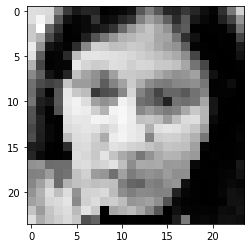

In [46]:
testImageOne = np.reshape(read_pgm("faces/s01/10035.pgm", byteorder='<'),(24*24) )
I1 = np.reshape(testImageOne,  (24,24))
plt.imshow(I1, cmap='Greys_r')
plt.show()

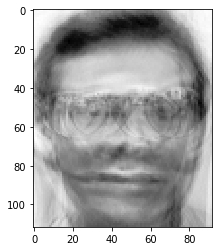

Mean squared error for the max eigen value =  13237025.21844581


In [42]:
testImageOne = np.reshape(read_pgm("faces/s05/1.pgm", byteorder='<'),(112*92) )
mean1 = mean[0]
testImageOne = testImageOne - mean1

# reconstructing using only one (max) eigen value
eigenValThreshold = 1
Eigens = eigenValues[0:eigenValThreshold]
maxVectors = eigenVectors[0:eigenValThreshold]

resultingImageOne = np.dot(np.dot(maxVectors, testImageOne.transpose()).transpose(), maxVectors)

I1 = np.reshape(resultingImageOne,  (112,92))
plt.imshow(I1, cmap='Greys_r')
plt.show()
print ("Mean squared error for the max eigen value = ", meanSquaredError(testImageOne, resultingImageOne))

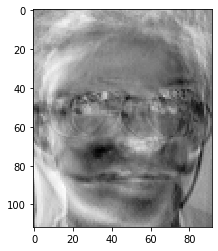

Mean squared error for the top 15 eigen values =  7270882.752815888


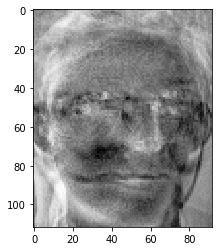

Mean squared error for all eigen values =  7541154.837005982


In [43]:
#reconstructing using top 15 eigen values
eigenValThreshold = 15
maxEigens = eigenValues[0:eigenValThreshold]
maxVectors = eigenVectors[0:eigenValThreshold]

resultingImageOne = np.dot(np.dot(maxVectors, testImageOne.transpose()).transpose(), maxVectors)

I1 = np.reshape(resultingImageOne,  (112,92))
plt.imshow(I1, cmap='Greys_r')
plt.show()
print ("Mean squared error for the top 15 eigen values = ", meanSquaredError(testImageOne, resultingImageOne))

#reconstructing using all the eigen values
eigenValThreshold = 200
maxEigens = eigenValues[0:eigenValThreshold]
maxVectors = eigenVectors[0:eigenValThreshold]

resultingImageOne = np.dot(np.dot(maxVectors, testImageOne.transpose()).transpose(), maxVectors)
I1 = np.reshape(resultingImageOne,  (112,92))
plt.imshow(I1, cmap='Greys_r')
plt.show()
print ("Mean squared error for all eigen values = ", meanSquaredError(testImageOne, resultingImageOne))

In [57]:
X = np.array([[2,-1,3],[3,4,-7],[1,2,4]])

In [59]:
mean = np.asarray([np.mean(X, axis=0)])
X1 = X - mean

In [63]:
eignMat = (np.dot(X1, X1.T))/float(N)
eigenValues, init_eigenVec = np.linalg.eig(eignMat)
eigenValues = np.abs(eigenValues)

In [66]:
init_eigenVec

array([[-0.40033977,  0.71161418,  0.57735027],
       [ 0.81644584, -0.00910268,  0.57735027],
       [-0.41610607, -0.7025115 ,  0.57735027]])

In [69]:
eigenVectors = np.dot(X1.transpose(), init_eigenVec)
eigenVectors = eigenVectors.transpose()

In [70]:
eigenVectors

array([[ 1.23255191e+00,  2.83391098e+00, -8.58056446e+00],
       [ 6.93408815e-01, -2.15304790e+00, -6.11484679e-01],
       [-2.22044605e-16, -5.23829148e-16,  8.88178420e-16]])

In [71]:
X

array([[ 2, -1,  3],
       [ 3,  4, -7],
       [ 1,  2,  4]])

In [72]:
index = eigenValues.argsort()[::-1]  
eigenValues = eigenValues[index]
eigenVectors = eigenVectors[index,:]
for count in range(len(eigenVectors)):
    eigenVectors[count] = eigenVectors[count]/float(np.linalg.norm(eigenVectors[count]))
eigenVectors

array([[ 0.13514667,  0.31073226, -0.9408405 ],
       [ 0.29593038, -0.91886962, -0.26096711],
       [-0.21051264, -0.49662389,  0.84205056]])